In [1]:
# download libraries
# ----------
!pip install spacy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 6.3 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/12.8 MB 16.4 MB/s eta 0:00:01
     -------- ------------------------------- 2.6/12.8 MB 21.0 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.8 MB 23.7 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB 24.8 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 24.7 MB/s eta 0:00:01
     ------------------------ --------------- 7.8/12.8 MB 25.0 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 26.7 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 28.5 MB/s eta 0:00:01
     ----------------------------------- --- 11.7/12.8 MB 28.5 MB/s eta 0:00:01
     --------------------------------------  12.8/1


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
###' ################################################################################
###'
###' IMPORT LIBRARIES
###'
###'

### pandas and numpy
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

### punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import en_core_web_sm
nlp = en_core_web_sm.load()
import scattertext as st

### textblob
from textblob import TextBlob

### countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.manifold import TSNE

### tqdm
from tqdm import tqdm

### gensim
import gensim
from gensim import models

### PCA
import random
from adjustText import adjust_text

### plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### kMeans and silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### ignore warnings
import warnings
warnings.filterwarnings('ignore')

###time
from datetime import datetime

In [3]:
import os
os.getcwd()

'C:\\Users\\OWNER\\TopicModeling'

In [4]:
# load libraries
# ----------
import spacy
import en_core_web_sm
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# settings
%matplotlib inline

# 1. Data preprocessing

In [5]:
# load the data
# ----------

df = pd.read_csv("articles_data.csv")
df.head()
#len(df)

,Title,Published Date,Type,Link,Authors,Abstract
0,The inhibitory impact of collaboration on the ...,25 Oct 2024,Original Research,https://www.frontiersin.org/journals/psycholog...,"Gongxiang Chen, Yuxuan Zhong, Sujie Li",The continued influence effect (CIE) of misinf...
1,RECALL prompting hierarchy improves responsive...,25 Oct 2024,Original Research,https://www.frontiersin.org/journals/psycholog...,"Rebekah Bosley, Susan J. Loveall, Karen Kate K...",The purpose of the current study was to expand...
2,Assessing key soft skills in organizational co...,25 Oct 2024,Original Research,https://www.frontiersin.org/journals/psycholog...,"Daiana Colledani, Egidio Robusto, Pasquale Ans...","Introduction:Soft skills, also known as transv..."
3,The impact of job stress on job satisfaction a...,25 Oct 2024,Original Research,https://www.frontiersin.org/journals/psycholog...,"Mei-Hui Lin, Ya-Hui Yen, Tsai-Fu Chuang, Ping-...",Objective:The main objective of this study is ...
4,Mapping perceived sentiments in university cam...,25 Oct 2024,Original Research,https://www.frontiersin.org/journals/psycholog...,"Qiyuan Yan, Yuxiang Sun",A sustainable university campus should accommo...


In [6]:
df_S = df[['Title','Abstract']].dropna()
df_S.head()
len(df_S)

241

spell = SpellChecker()

### text spell check
df_S['Title_spell'] = df_S['Title'].map(lambda x: spell.correction(x))
df_S['Abstract_spell'] = df_S['Abstract'].map(lambda x: spell.correction(x))
df_S.head()

# 2. tokenize

In [8]:
###' ################################################################################
###'
###' Function for Deleteing Punctuations and StopWords
###'
###'

### define fuction
def rem_punc_stop(text):
    
    # when text is None
    if text is None:  
        return None
    
    # add more stop words
    stop_words = STOP_WORDS 
    nlp.Defaults.stop_words |= {"abstract", "available", "student", "research", "study", "impact", "effect"}
    
    punc = set(punctuation)
    
    
    # remove the punctuation
    punc_free = "".join([ch for ch in text if ch not in punc])                                                               

    # apply nlp to punctuation-free object
    doc = nlp(punc_free)
    
    # lemmatize
    text_lemma = " ".join([word.lemma_ for word in doc])
    
    # extract words from processed text 
    spacy_words = text_lemma.split()
    spacy_words_1 = [word for word in spacy_words if not word.startswith("@")]
    spacy_words_2 = [word for word in spacy_words_1 if not word.startswith("http")]
    
    
    # filter out words 
    no_stop = [word for word in spacy_words_2 if word not in stop_words]
    
    # return
    return no_stop

In [9]:
###' ################################################################################
###'
###' Apply the Function and Tokenize Text Column
###'
###'

### sample from the whole dataset
df_S['Title_tokens'] = df_S['Title'].map(lambda x: rem_punc_stop(x))
df_S['Abstract_tokens'] = df_S['Abstract'].map(lambda x: rem_punc_stop(x))

df_S

,Title,Abstract,Title_tokens,Abstract_tokens
0,The inhibitory impact of collaboration on the ...,The continued influence effect (CIE) of misinf...,"[inhibitory, collaboration, continue, influenc...","[continue, influence, CIE, misinformation, ref..."
1,RECALL prompting hierarchy improves responsive...,The purpose of the current study was to expand...,"[RECALL, prompt, hierarchy, improve, responsiv...","[purpose, current, expand, previous, RECALL, d..."
2,Assessing key soft skills in organizational co...,"Introduction:Soft skills, also known as transv...","[assess, key, soft, skill, organizational, con...","[IntroductionSoft, skill, know, transversal, s..."
3,The impact of job stress on job satisfaction a...,Objective:The main objective of this study is ...,"[job, stress, job, satisfaction, turnover, int...","[objectivethe, main, objective, explore, relat..."
4,Mapping perceived sentiments in university cam...,A sustainable university campus should accommo...,"[mapping, perceive, sentiment, university, cam...","[sustainable, university, campus, accommodate,..."
...,...,...,...,...
236,Are all negative words alike? Behavioral diffe...,Studies examining whether stimulus valence aff...,"[negative, word, alike, behavioral, difference...","[examine, stimulus, valence, affect, cognitive..."
237,"Internet addiction, social phobia, substance a...",Aim:Internet addiction is a mental health issu...,"[internet, addiction, social, phobia, substanc...","[AimInternet, addiction, mental, health, issue..."
238,The effect of parental and teacher autonomy su...,Introduction:According to career construction ...,"[parental, teacher, autonomy, support, core, s...","[introductionaccorde, career, construction, th..."
239,Influence of problem-solving ability and perso...,Background:Basketball players are increasingly...,"[influence, problemsolving, ability, personali...","[BackgroundBasketball, player, increasingly, r..."


# 3. Word Features

In [10]:
###' ################################################################################
###'
###' GENERATE TEXT FEATURES
###' e.g. text_len, word count, polarity, subjectivity
###'
###'


# text_len & count
#df_S['Title_len'] = df_S['Title_tokens'].dropna().apply(len)
#df_S['Title_count'] = df_S['Title_tokens'].dropna().apply(lambda x: len(str(x).split()))

#df_S['Abstract_len'] = df_S['Abstract_tokens'].dropna().apply(len)
#df_S['Abstract_count'] = df_S['Abstract_tokens'].dropna().apply(lambda x: len(str(x).split()))

# join token
df_S['Title_join'] = df_S['Title_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
df_S['Abstract_join'] = df_S['Abstract_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")


### confirm generated data
df_S.head(n=5)

,Title,Abstract,Title_tokens,Abstract_tokens,Title_join,Abstract_join
0,The inhibitory impact of collaboration on the ...,The continued influence effect (CIE) of misinf...,"[inhibitory, collaboration, continue, influenc...","[continue, influence, CIE, misinformation, ref...",inhibitory collaboration continue influence mi...,continue influence CIE misinformation refer pe...
1,RECALL prompting hierarchy improves responsive...,The purpose of the current study was to expand...,"[RECALL, prompt, hierarchy, improve, responsiv...","[purpose, current, expand, previous, RECALL, d...",RECALL prompt hierarchy improve responsiveness...,purpose current expand previous RECALL dialogi...
2,Assessing key soft skills in organizational co...,"Introduction:Soft skills, also known as transv...","[assess, key, soft, skill, organizational, con...","[IntroductionSoft, skill, know, transversal, s...",assess key soft skill organizational context d...,IntroductionSoft skill know transversal skill ...
3,The impact of job stress on job satisfaction a...,Objective:The main objective of this study is ...,"[job, stress, job, satisfaction, turnover, int...","[objectivethe, main, objective, explore, relat...",job stress job satisfaction turnover intention...,objectivethe main objective explore relationsh...
4,Mapping perceived sentiments in university cam...,A sustainable university campus should accommo...,"[mapping, perceive, sentiment, university, cam...","[sustainable, university, campus, accommodate,...",mapping perceive sentiment university campus v...,sustainable university campus accommodate expe...


## 3.1. WordCount

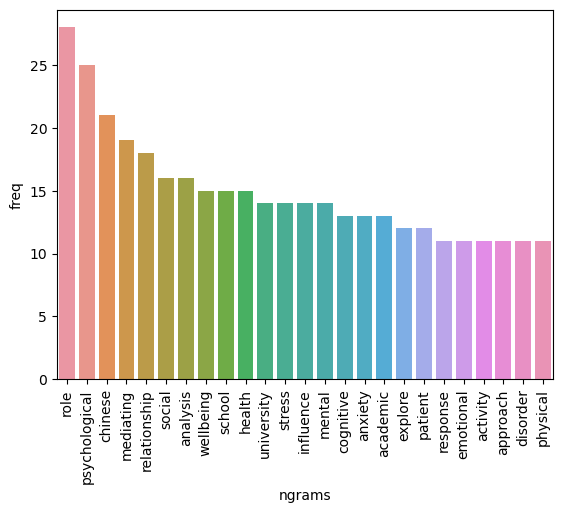

In [11]:
###' ################################################################################
###'
###' VISUALIZATION : WORDS COUNT with TItle
###' _ unigrams
###'
###'


### most frequent unigrams 
countvec = CountVectorizer(min_df = 5, ngram_range=(1,1))
ngrams = countvec.fit_transform(df_S['Title_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

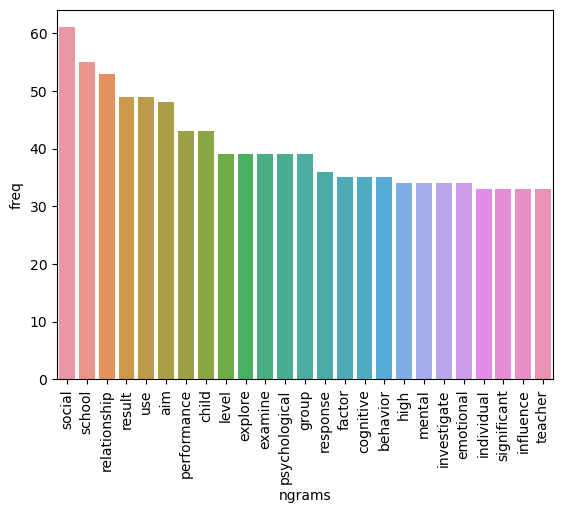

In [12]:
###' ################################################################################
###'
###' VISUALIZATION : WORDS COUNT with Abstract
###' _ unigrams
###'
###'


### most frequent unigrams 
countvec = CountVectorizer(min_df = 5, ngram_range=(1,1))
ngrams = countvec.fit_transform(df_S['Abstract_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

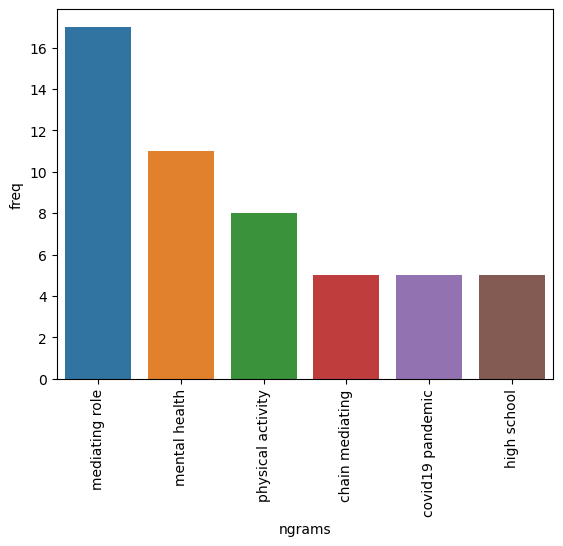

In [14]:
###' ################################################################################
###'
###' VISUALIZATION : WORDS COUNT
###' _ bigrams, trigrams
###'
###'


### most frequent bigrams 
countvec = CountVectorizer(min_df = 5, ngram_range=(2,3))


### fit and transform on tokens
ngrams = countvec.fit_transform(df_S['Title_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index(drop = True)


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

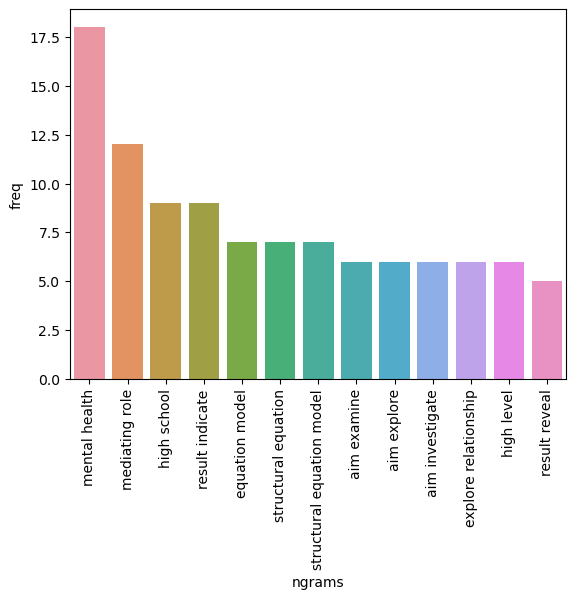

In [15]:
###' ################################################################################
###'
###' VISUALIZATION : WORDS COUNT
###' _ bigrams, trigrams
###'
###'


### most frequent bigrams 
countvec = CountVectorizer(min_df = 5, ngram_range=(2,3))


### fit and transform on tokens
ngrams = countvec.fit_transform(df_S['Abstract_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index(drop = True)


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

## 3.2. Word Clouds

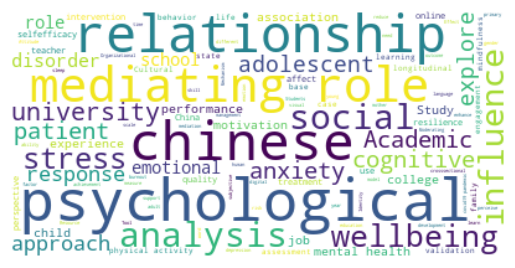

In [16]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###' by. party
###'
###'

### 0. Sample from Whole data

# apply function to text object
TO_text = ' '.join(df_S['Title_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()       

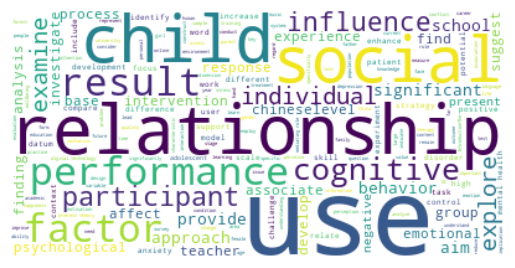

In [17]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###' by. party
###'
###'

### 0. Sample from Whole data

# apply function to text object
TO_text = ' '.join(df_S['Abstract_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()